epoch 20,x1 -2.382563,x2 -0.158591


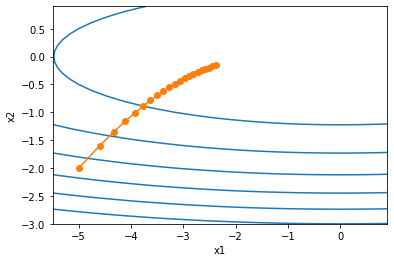

In [1]:
import math
import torch
import matplotlib.pyplot as plt 
import d2lzh as d2l 

def adagrad_2d(x1,x2,s1,s2):
    g1,g2,eps = 0.2 * x1,4 * x2,1e-6
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1 
    x2 -= eta / math.sqrt(s2 + eps) * g2 

    return x1,x2,s1,s2

def f_2d(x1,x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
d2l.show_trace_2d(f_2d,d2l.train_2d(adagrad_2d))

epoch 20,x1 -0.002295,x2 -0.000000


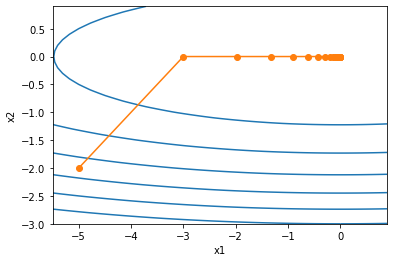

In [2]:
eta=2
d2l.show_trace_2d(f_2d,d2l.train_2d(adagrad_2d))

loss: 0.242485, 0.041670 sec per epoch 


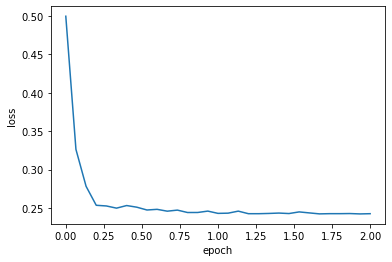

In [3]:
features,labels = d2l.get_data_ch7()

def init_adagrad_states():
    s_w = torch.zeros((features.shape[1],1),dtype=torch.float32)
    s_b = torch.zeros(1,dtype=torch.float32)

    return (s_w,s_b)

def adagrad(params,states,hyperparams):
    eps=1e-6
    for p,s in zip(params,states):
        s.data += (p.grad.data **2)
        p.data -= hyperparams["lr"] * p.grad.data / torch.sqrt(s + eps)

d2l.train_ch7(adagrad,init_adagrad_states(),{"lr":0.1},features,labels)

loss: 0.243186, 0.040241 sec per epoch 


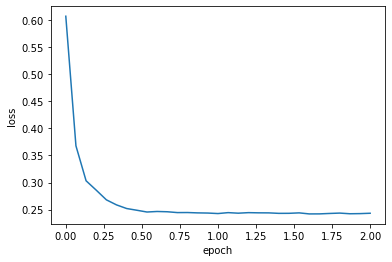

In [4]:
d2l.train_pytorch_ch7(torch.optim.Adagrad,{"lr":0.1},features,labels)